In [1]:
import warnings
warnings.filterwarnings("ignore")

def set_seed(seed=123):
    import random
    import numpy as np
    import tensorflow as tf
    import warnings
    warnings.filterwarnings("ignore")
    np.random.seed(seed)
    tf.random.set_seed(seed)
    random.seed(seed)

SEED = 123
set_seed(SEED)

# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import random
from subprocess import check_output

# Reading the dataset
data = pd.read_csv("cleaned_dataset.csv")

# Checking the dataset
data.head()
data.tail()
data.describe()



,Net_Profit_to_Total_Assets,Total_Liabilities_to_Total_Assets,Working_Capital_to_Total_Assets,Current_Assets_to_Short_term_Liabilities,Retained_Earnings_to_Total_Assets,Sales_to_Total_Assets,Equity_to_Total_Assets,Current_Liabilities_to_Total_Assets,Book_Value_of_Equity_to_Total_Liabilities,Gross_Profit_to_Sales,Sales_to_Inventory,target
count,49433.000000,49433.000000,49433.000000,4.943300e+04,49433.000000,49433.000000,49433.000000,49433.000000,49433.000000,49433.000000,4.943300e+04,49433.000000
mean,0.139540,0.536767,0.208886,5.577848e+04,0.068221,2.234839,0.628422,0.430858,11.019965,0.227738,3.097848e+08,0.045860
std,2.790334,5.111106,5.102068,1.236870e+07,6.298595,56.511493,12.642557,5.096996,473.521628,45.517774,1.414327e+09,0.209184
min,-463.890000,0.000000,-479.960000,0.000000e+00,-508.410000,0.000000,-479.910000,0.000000,-3.735100,-1578.700000,0.000000e+00,0.000000
25%,0.008818,0.178825,0.050185,7.990200e-01,0.000000,0.912060,0.330910,0.136051,0.197990,0.008002,4.990300e+00,0.000000
50%,0.070668,0.408540,0.254380,1.373600e+00,0.000000,1.107300,0.568390,0.291950,0.816110,0.050098,1.018000e+01,0.000000
75%,0.206320,0.651840,0.550610,2.493300e+00,0.251300,1.888000,0.809233,0.495750,2.217100,0.145260,2.801700e+01,0.000000
max,94.280000,480.960000,28.336000,2.750000e+09,322.200000,9742.300000,1084.700000,480.960000,53432.000000,9230.500000,9.990000e+09,1.000000


In [2]:
# Splitting the data into training and testing set
from sklearn.model_selection import train_test_split
X = data.drop(['target'], axis=1)
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)



In [3]:
#print number of features in X_train and their names
print("Number of features in X_train: ", len(X_train.columns))
print("Features in X_train: ", X_train.columns)


Number of features in X_train:  11
Features in X_train:  Index(['Net_Profit_to_Total_Assets', 'Total_Liabilities_to_Total_Assets',
       'Working_Capital_to_Total_Assets',
       'Current_Assets_to_Short_term_Liabilities',
       'Retained_Earnings_to_Total_Assets', 'Sales_to_Total_Assets',
       'Equity_to_Total_Assets', 'Current_Liabilities_to_Total_Assets',
       'Book_Value_of_Equity_to_Total_Liabilities', 'Gross_Profit_to_Sales',
       'Sales_to_Inventory'],
      dtype='object')


In [4]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold

# Apply SMOTE to balance the dataset
sm = SMOTE(random_state=SEED)
X_train, y_train = sm.fit_resample(X_train, y_train)

# Define cross-validation with stratified k-fold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)

In [5]:
#print number of features in X_train and their names in X_train
print("Number of features in X_train: ", len(X_train.columns))
print("Features in X_train: ", X_train.columns)

Number of features in X_train:  11
Features in X_train:  Index(['Net_Profit_to_Total_Assets', 'Total_Liabilities_to_Total_Assets',
       'Working_Capital_to_Total_Assets',
       'Current_Assets_to_Short_term_Liabilities',
       'Retained_Earnings_to_Total_Assets', 'Sales_to_Total_Assets',
       'Equity_to_Total_Assets', 'Current_Liabilities_to_Total_Assets',
       'Book_Value_of_Equity_to_Total_Liabilities', 'Gross_Profit_to_Sales',
       'Sales_to_Inventory'],
      dtype='object')


In [6]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier

In [7]:
#evaluate the performance of the models
def evaluate_model(model, X_test, y_test, y_pred, y_pred_prob):
    accuracy = accuracy_score(y_test, y_pred) *100
    print(f"Accuracy: {accuracy:.2f}")

    precision = precision_score(y_test, y_pred) *100
    print(f"Precision: {precision:.2f}")

    recall = recall_score(y_test, y_pred) *100
    print(f"Recall: {recall:.2f}")

    f1 = f1_score(y_test, y_pred) *100
    print(f"F1 Score: {f1:.2f}")

    roc_auc = roc_auc_score(y_test, y_pred_prob) *100
    print(f"ROC-AUC: {roc_auc:.2f}")

    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:\n", conf_matrix)

    class_report = classification_report(y_test, y_pred)
    print("Classification Report:\n", class_report)

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)
    cv_scores = cross_val_score(model, X_test, y_test, cv=cv, scoring='accuracy')
    print("Cross-Validation Scores:", cv_scores)
    print("Mean Cross-Validation Score:", cv_scores.mean())

    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    plt.figure()
    plt.plot(fpr, tpr, label='Model (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

    import seaborn as sns
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

Logistic Regression
Best Accuracy: 51.78 %
Best Parameters: {'C': 0.001, 'penalty': 'l2'}
Accuracy: 95.28
Precision: 100.00
Recall: 0.21
F1 Score: 0.43
ROC-AUC: 61.07
Confusion Matrix:
 [[9419    0]
 [ 467    1]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.98      9419
           1       1.00      0.00      0.00       468

    accuracy                           0.95      9887
   macro avg       0.98      0.50      0.49      9887
weighted avg       0.95      0.95      0.93      9887

Cross-Validation Scores: [0.95197169 0.95247725 0.95295903 0.95295903 0.95144158]
Mean Cross-Validation Score: 0.9523617148266746


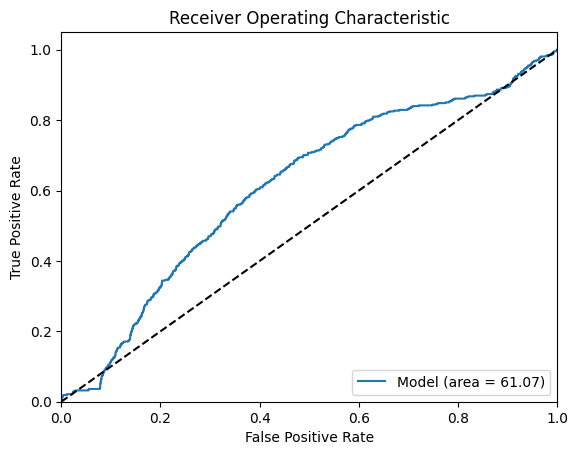

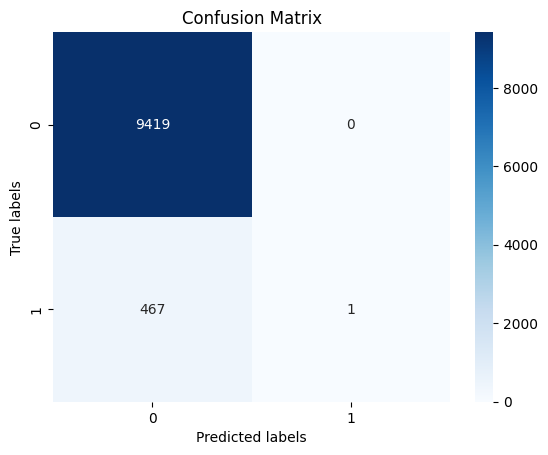

Decision Tree
Best Accuracy: 80.77 %
Best Parameters: {'criterion': 'gini', 'max_depth': 10}
Accuracy: 77.18
Precision: 12.09
Recall: 60.90
F1 Score: 20.17
ROC-AUC: 74.63
Confusion Matrix:
 [[7346 2073]
 [ 183  285]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.78      0.87      9419
           1       0.12      0.61      0.20       468

    accuracy                           0.77      9887
   macro avg       0.55      0.69      0.53      9887
weighted avg       0.94      0.77      0.84      9887

Cross-Validation Scores: [0.93933266 0.94084934 0.94031361 0.93980779 0.93626707]
Mean Cross-Validation Score: 0.939314093879411


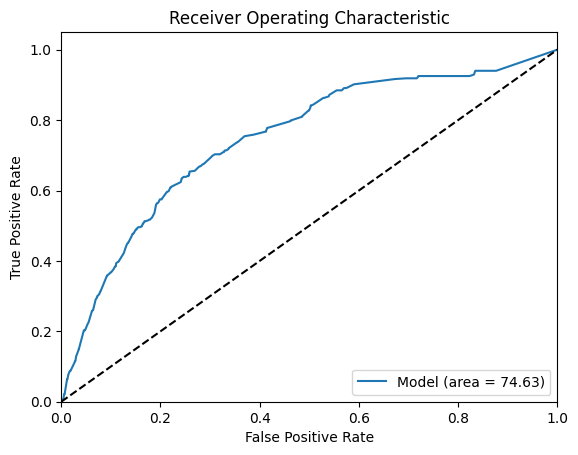

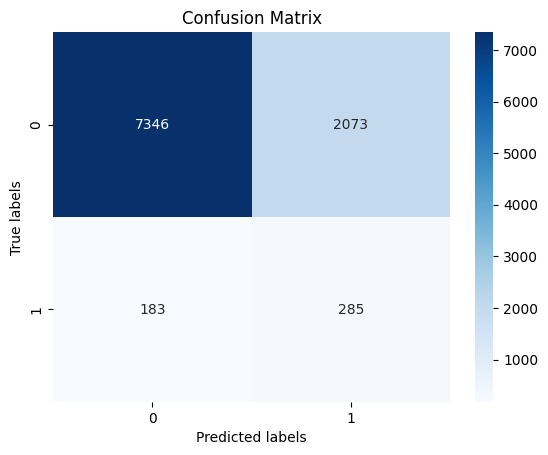

Random Forest
Best Accuracy: 82.21 %
Best Parameters: {'max_depth': 10, 'n_estimators': 1000}
Accuracy: 78.71
Precision: 12.98
Recall: 61.32
F1 Score: 21.43
ROC-AUC: 79.48
Confusion Matrix:
 [[7495 1924]
 [ 181  287]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.80      0.88      9419
           1       0.13      0.61      0.21       468

    accuracy                           0.79      9887
   macro avg       0.55      0.70      0.55      9887
weighted avg       0.94      0.79      0.85      9887

Cross-Validation Scores: [0.95247725 0.95247725 0.95295903 0.95144158 0.9519474 ]
Mean Cross-Validation Score: 0.9522605003035413


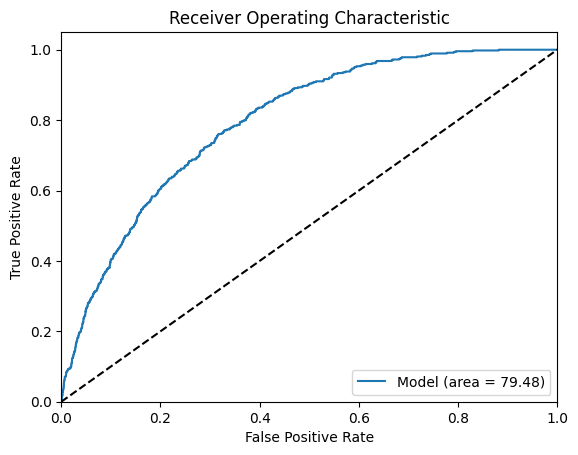

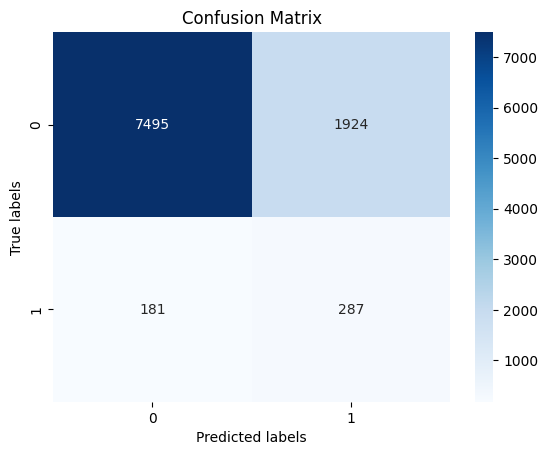

XGBoost
Best Accuracy: 95.15 %
Best Parameters: {'max_depth': 9, 'n_estimators': 1000}
Accuracy: 90.34
Precision: 18.34
Recall: 30.13
F1 Score: 22.80
ROC-AUC: 78.01
Confusion Matrix:
 [[8791  628]
 [ 327  141]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.93      0.95      9419
           1       0.18      0.30      0.23       468

    accuracy                           0.90      9887
   macro avg       0.57      0.62      0.59      9887
weighted avg       0.93      0.90      0.91      9887

Cross-Validation Scores: [0.94438827 0.94438827 0.94941831 0.94688923 0.94537178]
Mean Cross-Validation Score: 0.9460911708101202


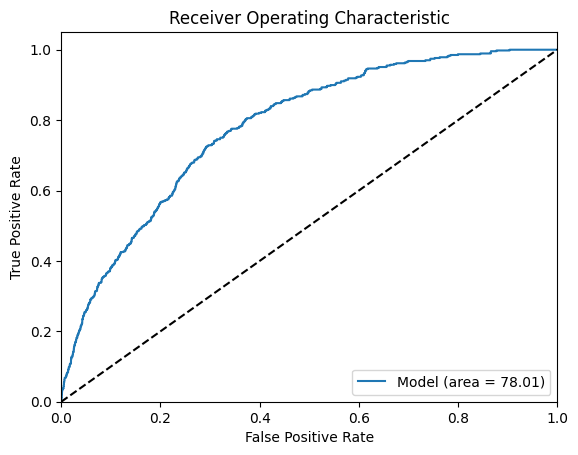

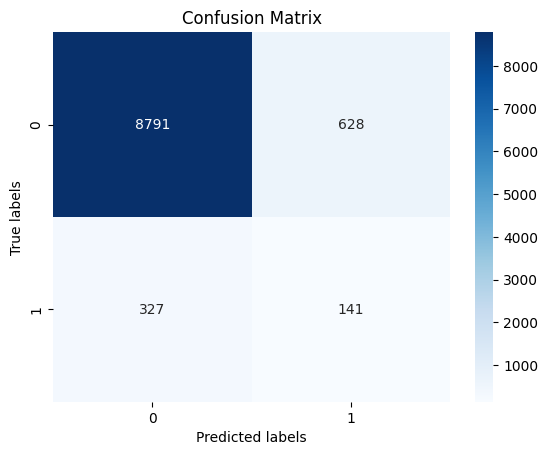

KNN
Best Accuracy: 90.82 %
Best Parameters: {'n_neighbors': 1, 'weights': 'uniform'}
Accuracy: 83.85
Precision: 8.03
Recall: 23.08
F1 Score: 11.91
ROC-AUC: 54.97
Confusion Matrix:
 [[8182 1237]
 [ 360  108]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.87      0.91      9419
           1       0.08      0.23      0.12       468

    accuracy                           0.84      9887
   macro avg       0.52      0.55      0.52      9887
weighted avg       0.92      0.84      0.87      9887

Cross-Validation Scores: [0.91203236 0.91809909 0.92362165 0.91097623 0.91552858]
Mean Cross-Validation Score: 0.9160515800257052


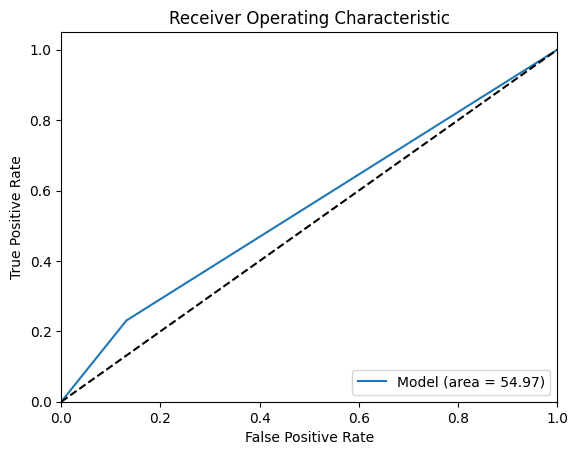

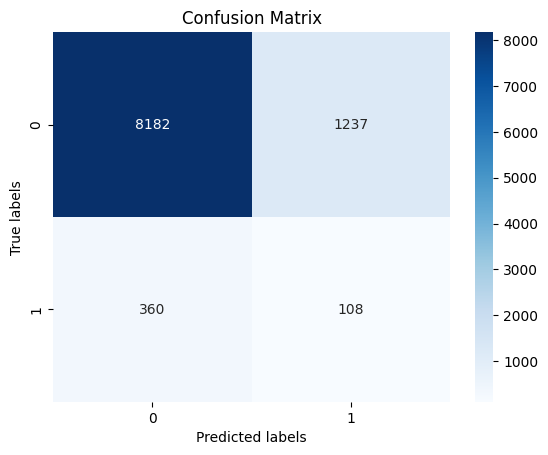

CatBoost
Best Accuracy: 93.22 %
Best Parameters: {'depth': 10, 'iterations': 1000}
Accuracy: 88.08
Precision: 17.47
Recall: 40.81
F1 Score: 24.47
ROC-AUC: 78.39
Confusion Matrix:
 [[8517  902]
 [ 277  191]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.90      0.94      9419
           1       0.17      0.41      0.24       468

    accuracy                           0.88      9887
   macro avg       0.57      0.66      0.59      9887
weighted avg       0.93      0.88      0.90      9887

Cross-Validation Scores: [0.94742164 0.94944388 0.95093576 0.95245321 0.95093576]
Mean Cross-Validation Score: 0.9502380510348276


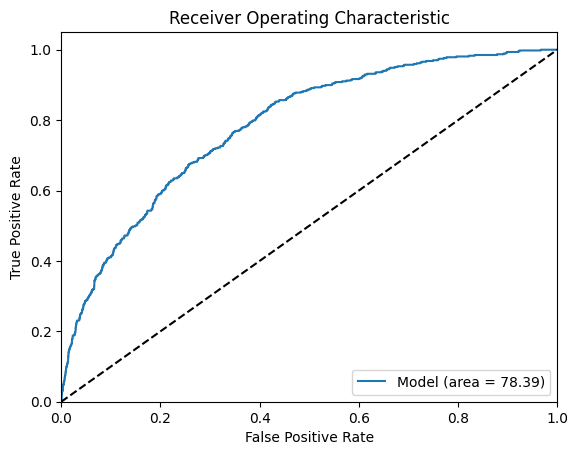

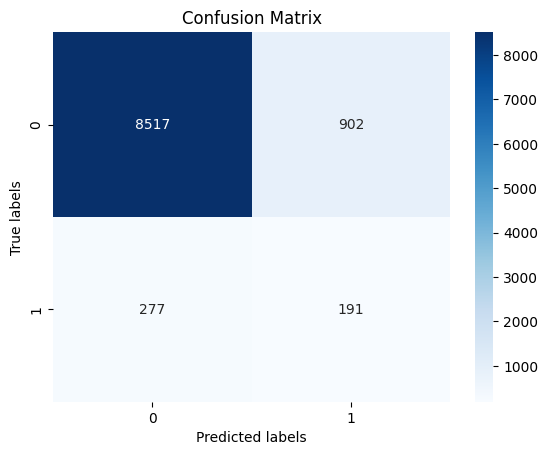

In [8]:
#hyperparameters for the models
params = {
    'Logistic Regression': {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2']},
    'Decision Tree': {'criterion': ['gini', 'entropy'], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
    'Random Forest': {'n_estimators': [10, 100, 1000], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
    'XGBoost': {'n_estimators': [10, 100, 1000], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
    'KNN': {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'weights': ['uniform', 'distance']},
    'CatBoost': {'iterations': [10, 100, 1000], 'depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}
}

#applying the models
models = {
    'Logistic Regression': LogisticRegression,
    'Decision Tree': DecisionTreeClassifier,
    'Random Forest': RandomForestClassifier,
    'XGBoost': XGBClassifier,
    'KNN': KNeighborsClassifier,
    'CatBoost': lambda: CatBoostClassifier(verbose=False)
}

for model_name, model in models.items():
    print(model_name)
    model = model()
    grid_search = GridSearchCV(estimator = model, param_grid = params[model_name], scoring = 'accuracy', cv = 5, n_jobs = -1)
    grid_search = grid_search.fit(X_train, y_train)
    best_accuracy = grid_search.best_score_
    best_parameters = grid_search.best_params_
    print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
    print("Best Parameters:", best_parameters)

    model = model.set_params(**best_parameters)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    evaluate_model(model, X_test, y_test, y_pred, y_pred_prob)

        

In [9]:
import winsound
# Play a sound to indicate the end of the process
winsound.MessageBeep()